In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import os
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
data=pd.read_csv(r"C:\Users\ADYTHYA ANI\Downloads\retail_store_inventory.csv")
data


,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73095,2024-01-01,S005,P0016,Furniture,East,96,8,127,18.46,73.73,20,Snowy,0,72.45,Winter
73096,2024-01-01,S005,P0017,Toys,North,313,51,101,48.43,82.57,10,Cloudy,0,83.78,Autumn
73097,2024-01-01,S005,P0018,Clothing,West,278,36,151,39.65,11.11,10,Rainy,0,10.91,Winter
73098,2024-01-01,S005,P0019,Toys,East,374,264,21,270.52,53.14,20,Rainy,0,55.80,Spring


In [5]:
data1=data.drop(["Date","Store ID","Product ID"],axis=1)
data1

,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...
73095,Furniture,East,96,8,127,18.46,73.73,20,Snowy,0,72.45,Winter
73096,Toys,North,313,51,101,48.43,82.57,10,Cloudy,0,83.78,Autumn
73097,Clothing,West,278,36,151,39.65,11.11,10,Rainy,0,10.91,Winter
73098,Toys,East,374,264,21,270.52,53.14,20,Rainy,0,55.80,Spring


In [6]:
data.describe()

,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,274.469877,136.464870,110.004473,141.494720,55.135108,10.009508,0.497305,55.146077
std,129.949514,108.919406,52.277448,109.254076,26.021945,7.083746,0.499996,26.191408
min,50.000000,0.000000,20.000000,-9.990000,10.000000,0.000000,0.000000,5.030000
25%,162.000000,49.000000,65.000000,53.670000,32.650000,5.000000,0.000000,32.680000
50%,273.000000,107.000000,110.000000,113.015000,55.050000,10.000000,0.000000,55.010000
75%,387.000000,203.000000,155.000000,208.052500,77.860000,15.000000,1.000000,77.820000
max,500.000000,499.000000,200.000000,518.550000,100.000000,20.000000,1.000000,104.940000


In [7]:
data.isnull().sum()

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64

In [8]:
data.shape


(73100, 15)

In [9]:

data.head(5)


,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [10]:
data.tail(5)

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
73095,2024-01-01,S005,P0016,Furniture,East,96,8,127,18.46,73.73,20,Snowy,0,72.45,Winter
73096,2024-01-01,S005,P0017,Toys,North,313,51,101,48.43,82.57,10,Cloudy,0,83.78,Autumn
73097,2024-01-01,S005,P0018,Clothing,West,278,36,151,39.65,11.11,10,Rainy,0,10.91,Winter
73098,2024-01-01,S005,P0019,Toys,East,374,264,21,270.52,53.14,20,Rainy,0,55.80,Spring
73099,2024-01-01,S005,P0020,Groceries,East,117,6,165,2.33,78.39,20,Rainy,1,79.52,Spring


In [11]:
data["Demand Forecast"].value_counts()

Demand Forecast
46.06     12
21.84     12
33.84     11
17.33     11
95.24     11
          ..
198.84     1
247.78     1
389.58     1
271.09     1
277.27     1
Name: count, Length: 31608, dtype: int64

In [12]:
data.groupby("Demand Forecast").mean(numeric_only=True)

,Inventory Level,Units Sold,Units Ordered,Price,Discount,Holiday/Promotion,Competitor Pricing
Demand Forecast,,,,,,,
-9.99,190.0,0.0,87.0,77.12,0.0,0.0,74.900
-9.97,52.0,0.0,142.0,19.30,5.0,0.0,23.900
-9.79,182.0,0.0,33.0,62.77,15.0,0.0,65.730
-9.67,64.0,0.0,156.0,19.54,20.0,0.0,16.120
-9.62,220.0,0.0,184.0,54.97,15.0,0.0,51.630
...,...,...,...,...,...,...,...
504.76,500.0,488.0,100.0,18.45,10.0,0.0,13.460
505.39,499.0,488.0,116.0,88.48,15.0,1.0,90.660
506.37,494.5,491.5,87.5,76.16,15.0,0.5,74.715


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

In [14]:


# Initialize LabelEncoders for each column
obj1, obj2, obj3, obj4,obj5,obj6,obj7 = [LabelEncoder() for i in range(7)]

# Apply Label Encoding
data["Date"] = obj1.fit_transform(data["Date"])
data["Store ID"] = obj2.fit_transform(data["Store ID"])
data["Product ID"] = obj3.fit_transform(data["Product ID"])
data["Category"] = obj4.fit_transform(data["Category"])
data["Region"] = obj5.fit_transform(data["Region"])
data["Weather Condition"] = obj6.fit_transform(data["Weather Condition"])
data["Seasonality"] = obj7.fit_transform(data["Seasonality"])

In [15]:
data.corr()['Demand Forecast'].sort_values(ascending=False)

Demand Forecast       1.000000
Units Sold            0.996853
Inventory Level       0.588561
Product ID            0.006659
Store ID              0.005666
Weather Condition     0.004768
Discount              0.002338
Competitor Pricing    0.000844
Price                 0.000675
Category              0.000495
Holiday/Promotion    -0.000526
Units Ordered        -0.001102
Date                 -0.002125
Region               -0.002467
Seasonality          -0.003109
Name: Demand Forecast, dtype: float64

In [16]:
data1=data.drop(["Date","Store ID","Product ID"],axis=1)
data1

,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,3,1,231,127,55,135.47,33.50,20,1,0,29.69,0
1,4,2,204,150,66,144.04,63.01,20,3,0,66.16,0
2,4,3,102,65,51,74.02,27.99,10,3,1,31.32,2
3,4,1,469,61,164,62.18,32.72,10,0,1,34.74,0
4,1,0,166,14,135,9.26,73.64,0,3,0,68.95,2
...,...,...,...,...,...,...,...,...,...,...,...,...
73095,2,0,96,8,127,18.46,73.73,20,2,0,72.45,3
73096,4,1,313,51,101,48.43,82.57,10,0,0,83.78,0
73097,0,3,278,36,151,39.65,11.11,10,1,0,10.91,3
73098,4,0,374,264,21,270.52,53.14,20,1,0,55.80,1


In [17]:
x=data1.drop(["Demand Forecast"],axis=1)
y=data1["Demand Forecast"]

In [18]:
x

,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,3,1,231,127,55,33.50,20,1,0,29.69,0
1,4,2,204,150,66,63.01,20,3,0,66.16,0
2,4,3,102,65,51,27.99,10,3,1,31.32,2
3,4,1,469,61,164,32.72,10,0,1,34.74,0
4,1,0,166,14,135,73.64,0,3,0,68.95,2
...,...,...,...,...,...,...,...,...,...,...,...
73095,2,0,96,8,127,73.73,20,2,0,72.45,3
73096,4,1,313,51,101,82.57,10,0,0,83.78,0
73097,0,3,278,36,151,11.11,10,1,0,10.91,3
73098,4,0,374,264,21,53.14,20,1,0,55.80,1


In [19]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)


 ### Visualization of Target Variable (Demand Forecast)

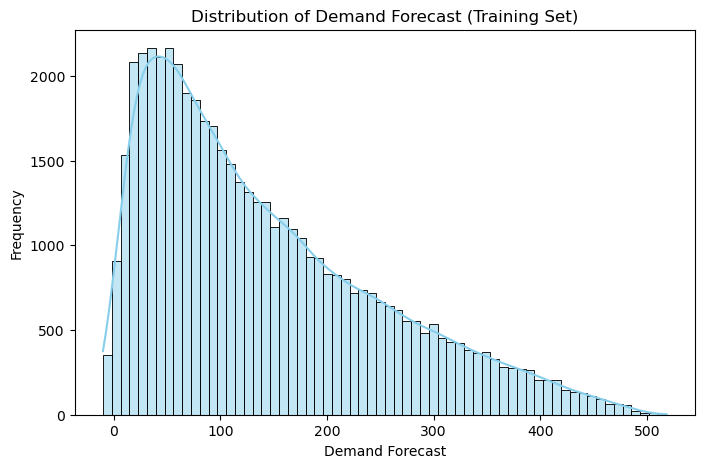

In [20]:





# Plot distribution of target variable
plt.figure(figsize=(8,5))
sns.histplot(ytrain, kde=True, color='skyblue')
plt.title('Distribution of Demand Forecast (Training Set)')
plt.xlabel('Demand Forecast')
plt.ylabel('Frequency')
plt.show()

### model creation

### Accuracy using RandomForestRegressor

In [26]:
rf=RandomForestRegressor(n_estimators=200,max_depth=10,random_state=42)


In [28]:
rf.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)

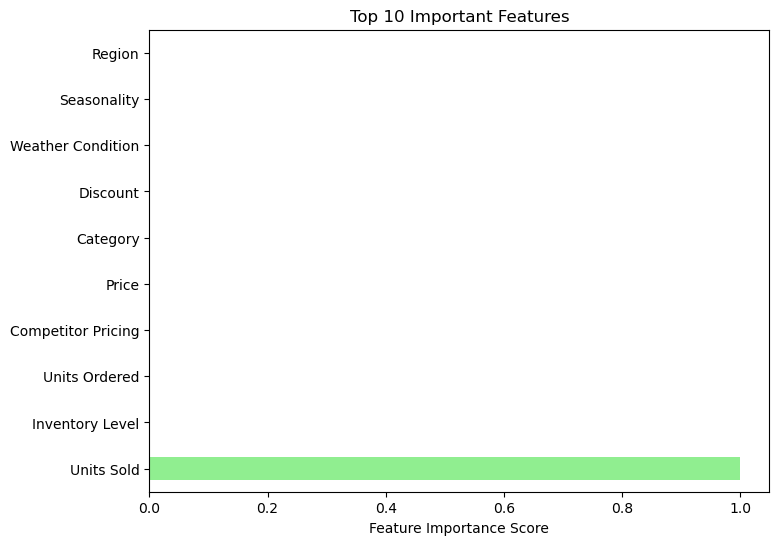

In [29]:
# After fitting RandomForest
importances = rf.feature_importances_
features = xtrain.columns

# Plotting feature importance
feat_importances = pd.Series(importances, index=features)
feat_importances.nlargest(10).plot(kind='barh', color='lightgreen', figsize=(8,6))
plt.title('Top 10 Important Features')
plt.xlabel('Feature Importance Score')
plt.show()


# Random Forest models can measure how much each feature contributes to the predictive performance.
# This code helps identify which features have the most influence on the model's predictions.

In [30]:
rf_ypred=rf.predict(xtest)
rf_ypred

array([142.35445909, 109.79041885,  75.53659648, ...,  16.03099754,
        53.40972691, 129.64781231])

##### Mean Absolute Error (MAE)

In [31]:
from sklearn.metrics import mean_absolute_error
rf_mae = mean_absolute_error(ytest, rf_ypred)*100
rf_mae
# Mean Absolute Error (MAE)
# Measures the average absolute difference between predicted and actual values.

749.5141626873256

### Mean Squared Error (MSE)

In [32]:
from sklearn.metrics import mean_squared_error

rf_mse = mean_squared_error(ytest, rf_ypred)*100
rf_mse
#  Mean Squared Error (MSE)
# Squares the errors before averaging — penalizes large errors more than MAE.

7580.936549508142

### Root Mean Squared Error (RMSE)

In [33]:
import numpy as np
rf_rmse = np.sqrt(rf_mse)*100
rf_rmse
# Root Mean Squared Error (RMSE)
# Just the square root of MSE.

# Brings the units back to the original scale of the target variable.

8706.857383412307

#### R² Score (Coefficient of Determination)

In [34]:
# R² Score (Coefficient of Determination)
# Tells you how much of the variance in the target is explained by the model.

# Ranges from -∞ to 1.0. Closer to 1 = better.

from sklearn.metrics import r2_score

rf2 = r2_score(ytest, rf_ypred)*100
rf2





99.36587279636227

### Cross-Validation Score

In [35]:
from sklearn.model_selection import cross_val_score

# 5-fold cross validation
scores = cross_val_score(rf, xtrain, ytrain, cv=5, scoring='r2')
print(f"Cross-Validation R2 Scores: {scores}")
print(f"Average R2 Score: {scores.mean():.4f}")  

Cross-Validation R2 Scores: [0.99366002 0.993441   0.99348079 0.99361527 0.99359865]
Average R2 Score: 0.9936


In [36]:
print(f"MAE: {rf_mae}")
print(f"MSE: {rf_mse}")
print(f"RMSE: {rf_rmse}")
print(f"R² Score: {rf2}")

MAE: 749.5141626873256
MSE: 7580.936549508142
RMSE: 8706.857383412307
R² Score: 99.36587279636227


In [37]:
rf.score(xtrain,ytrain)*100

99.46120650777281

In [38]:
rf.score(xtest,ytest)*100





99.36587279636227

### Accuracy using Linear Regression


In [42]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [43]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [44]:
lr.score(xtrain,ytrain)*100

99.36997654324901

In [45]:

lr.score(xtest,ytest)*100

99.37560523610941

In [46]:
lr_ypred=lr.predict(xtest)
lr_ypred

array([143.00546843, 110.03265175,  75.00134539, ...,  16.23105949,
        53.2228142 , 128.1682917 ])

In [47]:
lr_mae = mean_absolute_error(ytest, lr_ypred)*100
lr_mae

746.4730979739078

In [48]:
lr_mse = mean_squared_error(ytest, lr_ypred)*100
lr_mse

7464.586063719515

In [49]:
lr_rmse = np.sqrt(lr_mse)*100
lr_rmse

8639.783598979498

In [50]:
lr2 = r2_score(ytest, lr_ypred)*100
lr2

99.37560523610941

In [52]:
print(f"MAE: {lr_mae}")
print(f"MSE: {lr_mse}")
print(f"RMSE: {lr_rmse}")
print(f"R² Score: {lr2}")

MAE: 746.4730979739078
MSE: 7464.586063719515
RMSE: 8639.783598979498
R² Score: 99.37560523610941


### Accuracy using DecisionTreeRegressor

In [53]:
from sklearn.tree import DecisionTreeRegressor

In [54]:
dr=DecisionTreeRegressor()

In [55]:
dr.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [56]:
dr.score(xtrain,ytrain)*100

100.0

In [57]:

dr.score(xtest,ytest)*100

98.7078544723897

In [58]:
dr_ypred=dr.predict(xtest)
dr_ypred

array([139.21, 103.62,  88.55, ...,   9.54,  45.97, 115.43])

In [59]:
dr_mae = mean_absolute_error(ytest, dr_ypred)*100
dr_mae

1014.0704058367535

In [60]:
dr_mse = mean_squared_error(ytest, dr_ypred)
dr_mse

154.47489401732784

In [61]:
dr_rmse = np.sqrt(dr_mse)
dr_rmse

12.428792942893844

In [64]:
dr2=r2_score(ytest, dr_ypred)*100
dr2

98.7078544723897

In [65]:
print(f"MAE: {dr_mae}")
print(f"MSE: {dr_mse}")
print(f"RMSE: {dr_rmse}")
print(f"R² Score: {dr2}")

MAE: 1014.0704058367535
MSE: 154.47489401732784
RMSE: 12.428792942893844
R² Score: 98.7078544723897


In [66]:
print(xtrain.shape,ytrain.shape,xtest.shape)

(51170, 11) (51170,) (21930, 11)


#### save to pickle

In [67]:
import pickle


In [68]:
filename="trained_model.sav" # it is file to save the model that is created by ourself
pickle.dump(rf,open(filename,"wb"))
            # wb is for writing
# loading the saved model
loaded_model=pickle.load(open(filename,"rb"))
                         # rb is for read


loaded_model

RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)

In [69]:

!pip install gradio

In [70]:
import gradio as gr
import pickle
import numpy as np

# Load the trained model
model = pickle.load(open(r"C:\Users\ADYTHYA ANI\trained_model.sav", "rb"))

# Mapping for dropdown options to encoded numbers
category_mapping = {
    "Electronics": 0,
    "Clothing": 1,
    "Food": 2,
    "Furniture": 3,
    "Books": 4
}

region_mapping = {
    "North": 0,
    "South": 1,
    "East": 2,
    "West": 3,
    "Central": 4
}

weather_mapping = {
    "Sunny": 0,
    "Rainy": 1,
    "Snowy": 2,
    "Cloudy": 3,
    "Stormy": 4
}

seasonality_mapping = {
    "Low": 0,
    "Medium": 1,
    "High": 2
}

# Define the prediction function
def demand_forecast(Category, Region, Inventory_Level, Units_Sold, Units_Ordered,
                    Price, Discount, Weather_Condition, Holiday_Promotion,
                    Competitor_Pricing, Seasonality):
    
    input_data = np.array([
        category_mapping[Category],
        region_mapping[Region],
        Inventory_Level,
        Units_Sold,
        Units_Ordered,
        Price,
        Discount,
        weather_mapping[Weather_Condition],
        Holiday_Promotion,
        Competitor_Pricing,
        seasonality_mapping[Seasonality]
    ]).reshape(1, -1)

    prediction = model.predict(input_data)[0]

    # Interpretation
    if prediction > 150:
        interpretation = "Very high expected demand"
    elif prediction > 100:
        interpretation = "High expected demand"
    elif prediction > 50:
        interpretation = "Moderate demand"
    else:
        interpretation = "Low expected demand"

    return f"Predicted Demand Forecast: {prediction:.2f} ({interpretation})"

# Gradio Interface
iface = gr.Interface(
    fn=demand_forecast,
    inputs=[
        gr.Dropdown(list(category_mapping.keys()), label="Category"),
        gr.Dropdown(list(region_mapping.keys()), label="Region"),
        gr.Number(label="Inventory Level"),
        gr.Number(label="Units Sold"),
        gr.Number(label="Units Ordered"),
        gr.Number(label="Price"),
        gr.Number(label="Discount"),
        gr.Dropdown(list(weather_mapping.keys()), label="Weather Condition"),
        gr.Radio(choices=[0, 1], label="Holiday/Promotion (0: No, 1: Yes)"),
        gr.Number(label="Competitor Pricing"),
        gr.Dropdown(list(seasonality_mapping.keys()), label="Seasonality"),
    ],
    outputs="text",
    title="🛒 Retail Demand Forecast Predictor",
    description="Fill in product and store details to predict demand forecast easily!"
)

iface.launch()

* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
